p(w|d) = Sum_by_t (p(w|t)*p(t|d))

w - index for words<br>
d - index for documents<br>
t - index for topic<br>

w|t - the frequency of w - word with in t - topic<br>
t|d - the frequency of t - topic with in d - document<br>
w|d - the frequency of w - word within d - document<br>


p(w|d) is the well known matrix and it can be measured quite simply. The matrix p(w|t) and p(t|d) is not known or partially known and it has to be reconstructed by the special approach like a Dirichlet allocation.<br>
https://papers.neurips.cc/paper/2010/file/71f6278d140af599e06ad9bf1ba03cb0-Paper.pdf



In [3]:
# open source morphology analysis tool
!pip install razdel
# yandex morphology analysis tool
!pip install pymorphy2
# open source morphology analysis tool
!pip install pyLDAvis --user

#### <i>articles.csv</i>  -> dataset with all TXT article content<br>
#### <i>user_articles.csv</i> -> dataset with previously read articles IDs versus user IDs<br>



In [127]:
import pandas as pd

articles = pd.read_csv("articles.csv")
print(articles.shape)
articles.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [128]:
user_articles = pd.read_csv("user_articles.csv")
print(user_articles.shape)
user_articles.head(3)

(8000, 2)


,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [129]:
# Regular expressions:-----------------------------------------
import re
import numpy as np

# Tokenizers:--------------------------------------------------
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from razdel import tokenize

# Stopwords from NLTK:-----------------------------------------
from nltk.corpus import stopwords

import pymorphy2



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
# Razdel tokenization example:---------------------------------
for word in tokenize("Мама мыла, выла-выла раму-маму"):
    print (word)

Substring(0, 4, 'Мама')
Substring(5, 9, 'мыла')
Substring(9, 10, ',')
Substring(11, 20, 'выла-выла')
Substring(21, 30, 'раму-маму')


In [131]:
# Nltk tokenization:------------------------------------------
word_tokenize("Мама мыла, выла-выла раму-маму", language="russian")

['Мама', 'мыла', ',', 'выла-выла', 'раму-маму']

In [132]:
# Stemming:---------------------------------------------------
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="russian")
snowball.stem("Раннего")


'ран'

In [133]:
# Lets build morphoology analyzer. It's used to simplify words with in text
morph = pymorphy2.MorphAnalyzer()

morph.parse("Раннего")

# tag обозначает набор граммем. В данном случае слово хочу — это глагол (VERB) несовершенного вида (impf), переходный (tran), единственного числа (sing), 1 лица (1per), настоящего времени (pres), изъявительного наклонения (indc);
# normal_form— нормального форма слова;
# score — оценка вероятности того, что данный разбор правильный;
# methods_stack — тип словаря распарсенного слова с его индексом.


[Parse(word='раннего', tag=OpencorporaTag('ADJF neut,sing,gent'), normal_form='ранний', score=0.807692, methods_stack=((DictionaryAnalyzer(), 'раннего', 2763, 15),)),
 Parse(word='раннего', tag=OpencorporaTag('ADJF masc,sing,gent'), normal_form='ранний', score=0.153846, methods_stack=((DictionaryAnalyzer(), 'раннего', 2763, 1),)),
 Parse(word='раннего', tag=OpencorporaTag('ADJF anim,masc,sing,accs'), normal_form='ранний', score=0.038461, methods_stack=((DictionaryAnalyzer(), 'раннего', 2763, 3),))]

In [134]:
#morph.parse("хотеть")[0].normal_form

#morph.parse("хочу")[0].normal_form

morph.parse("хотят")[0].normal_form


'хотеть'

In [264]:
# Loading stopwords: It's important that stop words are closed to used language

nltk.download('stopwords')
stopword_ru = stopwords.words('russian')
print ("  --> The stopword list={},\nlist.size={}".format(stopword_ru,len(stopword_ru)))

# Loading addtional stopwords:------------------------
with open('additional_stopwords.txt', mode="r", encoding="utf-8") as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]

# Collecting all in one:------------------------------
stopword_ru += additional_stopwords
print ("  --> The stopword all-list={},\nall-list.size={}".format(stopword_ru,len(stopword_ru)))


  --> The stopword list=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [265]:


def clean_text(text):

    if not isinstance(text, str):
        text = str(text)
    
    # register:
    text = text.lower()
    # removing text breaking:
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub("n",' ', text)
    
    #tokens = list(tokenize(text))
    #words = [_.text for _ in tokens]
    #words = [w for w in words if w not in stopword_ru]
    #return " ".join(words)
    return text


def lemmatization(text,unique_word_map={}):

    # Making to string:----------------------------------------------------------
    if not isinstance(text, str):
        text = str(text)
    
    # Razdel tokenizer:----------------------------------------------------------
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]
    #print ("      > Tokenized words: {}".format(words))

    word_lems = []
    for word in words:
        
        # Deleting the first '-':-------------
        if word[0] == '-':
            word = word[1:]
        
        # Checking length:--------------------
        if len(word)>1:
            if word in unique_word_map:
                word_lems.append(unique_word_map[word])
            else:
                # Normalizing:----------------
                normalized_word=morph.parse(word)[0].normal_form
                
                xtr = unique_word_map[word] = normalized_word
                word_lems.append(xtr)
                
    #print ("      > Lems={}".format(word_lems))
    
    # Removing stopwords: STOPWORD_RU:---------
    word_lems_without_stopwords=[word_lem for word_lem in word_lems if not word_lem in stopword_ru] # [6]
    #print ("      > Cleaned lems={}".format(word_lems_without_stopwords))
    
    return word_lems_without_stopwords

In [266]:

# Cleaning all article titles:-------------------------------------------------
articles['cleaned_title'] = articles['title'].apply(lambda title: clean_text(title), 1)
articles['cleaned_title']

0        заместитель председателя правительства рф серг...
1        матч  финала кубка россии по футболу был приос...
2        форвард авангарда томаш заборский прокомментир...
3        главный тренер кубани юрий красножан прокоммен...
4        решением попечительского совета владивостокско...
                               ...                        
26995    ученые токийского университета морских наук и ...
26996    главой кафедры отечественной истории xx века и...
26997    американские ученые уточнили возраст расположе...
26998    за последние  лет тропический углеродный цикл ...
26999    у живших примерно  тыс лет назад на территории...
Name: cleaned_title, Length: 27000, dtype: object

In [267]:

# lemmatiztion all article titles:----------------------------------------------
articles['lemma_title'] = articles['cleaned_title'].apply(lambda cleaned_title: lemmatization(cleaned_title),1)
articles['lemma_title']

0        [заместитель, председатель, правительство, рф,...
1        [матч, финал, кубок, россия, футбол, приостано...
2        [форвард, авангард, томаш, заборский, прокомме...
3        [главный, тренер, кубань, юрий, красножанин, п...
4        [решение, попечительский, совет, владивостокск...
                               ...                        
26995    [учёный, токийский, университет, морской, наук...
26996    [глава, кафедра, отечественный, история, xx, в...
26997    [американский, учёный, уточнить, возраст, расп...
26998    [последний, тропический, углеродный, цикл, чув...
26999    [жить, примерно, тыс, назад, территория, совре...
Name: lemma_title, Length: 27000, dtype: object

In [268]:
# Lets make 2d-array:----------------------------------------------------------
texts =  [a for a in articles['lemma_title'].values]
texts

[['заместитель',
  'председатель',
  'правительство',
  'рф',
  'сергей',
  'иванов',
  'избрать',
  'председатель',
  'совет',
  'пбк',
  'цска',
  'прессслужба',
  'армеец',
  'решение',
  'единогласно',
  'принять',
  'первый',
  'заседание',
  'совет',
  'клуб',
  'основной',
  'функция',
  'орган',
  'обсуждение',
  'текущий',
  'состояние',
  'планирование',
  'утверждение',
  'стратегия',
  'развитие',
  'клуб',
  'близкий',
  'перспектива',
  'состав',
  'совет',
  'войти',
  'георгий',
  'полтавченко',
  'полномочный',
  'центральный',
  'федеральный',
  'округ',
  'алексей',
  'седов',
  'генералполковник',
  'начальник',
  'служба',
  'защита',
  'конституционный',
  'строй',
  'борьба',
  'терроризм',
  'фсб',
  'рф',
  'александр',
  'новак',
  'заместитель',
  'министр',
  'финансы',
  'рф',
  'вячеслав',
  'полтавец',
  'заместитель',
  'генеральный',
  'директор',
  'руководитель',
  'блок',
  'взаимодействие',
  'орган',
  'власть',
  'социальный',
  'корпоративный',
 

In [269]:
# Dictionary libraries:----------------------------------------
#from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Making gensim.corpora.dictionary:--------------------------------------------
common_dictionary = Dictionary(texts)
print ("  --> Common dictionary: {}".format(common_dictionary))
print ("  --> Common dictionary at: {}".format(common_dictionary[0]))

# Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count)
# 2-tuples. Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded).
# No further preprocessing is done on the words in document; apply tokenization, stemming etc.
# before calling this method !!!
word_frequency_vectors = [common_dictionary.doc2bow(text) for text in texts]
print ("  --> Corpus[0]: {}".format(word_frequency_vectors[0]))


  --> Common dictionary: Dictionary(135645 unique tokens: ['александр', 'алексей', 'андрей', 'армеец', 'банк']...)
  --> Common dictionary at: александр
  --> Corpus[0]: [(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 1), (18, 4), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 3), (89, 2), (90, 1)]


In [270]:
# print ("  --> Common dictionary ID - TOKEN: {}".format(common_dictionary.id2token))
# It produces a lot of data. It works only if
# common_dictionary.id2token

#### Building LDA model:

Lets think about the number of topics. It's set as a euristic number of the user research experience

In [416]:
from gensim.models import LdaModel

assumed_topic_number = 25
lda_model = LdaModel(corpus=word_frequency_vectors, num_topics=assumed_topic_number, id2word=common_dictionary, random_state=32)

# see https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.html


In [417]:
# Persisting to disk:------------------------------------------
# from gensim.test.utils import datapath

# lda_model.save(datapath('model-lda.data'))

# Reading from disk:-------------------------------------------
# lda_model = LdaModel.load(datapath('model-lda.data'))

#### Experiments

In [418]:

# Let's select some three LEMMATIZED titles as 2d array:------------------------------
#other_texts = [text for text in articles['lemma_title'].iloc[:3]]

# Let's make new corpus by the frequency analysis written as DOC_2BOW:----------------
#other_corpus = [common_dictionary.doc2bow(other_text) for other_text in other_texts]

#lda_model[other_corpus[2]]

#for cnt in range (0,3):
    # print(other_texts[cnt])
    #print ("      > {}".format(lda_model[other_corpus[cnt]]))

In [419]:
#topic_generator=lda_model.show_topics(num_topics = assumed_topic_number, num_words=20, formatted =True)
#for topic in topic_generator:
#    print (topic)

# About 'assumed_topic_number'==initial topic number:
# The lower initial topic number the higher information of each topic
# The higher initial topic number the lower information of each topic


In [420]:
#lda_model.get_topic_terms(topicid=0, topn=assumed_topic_number)

# Return a list of (word_id, probability) 2-tuples for the most probable words in topic topicid.
# Only return 2-tuples for the topn most probable words (ignore the rest).

In [421]:
# The most interesting is connected with calculating LDA_VECTOR.

# 1. Calculating by the  [bow - coded object] - operator
# 2. Calculating by the get_document_topics (bow - coded object)
# https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.html

#cleaned_text_example = ['цска', 'председатель', 'принять', 'рф', 'алексей']

#cleaned_text_bow = common_dictionary.doc2bow(cleaned_text_example);

#print ("-------------------------------------------------------")
#for cnt in range(10):
#    print ("  --> Text bow: {}".format(cleaned_text_bow))
#    print ("  --> Making LDA vector 1: {}".format(lda_model[cleaned_text_bow]))

#print ("-------------------------------------------------------")
#for cnt in range(10):
#    print ("  --> Text bow: {}".format(cleaned_text_bow))
#    print ("  --> Making LDA vector 2: {}".format(lda_model.get_document_topics(bow=cleaned_text_bow)))

# Both of the methods are not stable: It means that it returns unpredictable result,
# but it varies of consist of calculated options


In [422]:
import numpy as np

# Lets transform any text to definite vector:
def calculate_lda_vector(lda_model,dictionary,cleaned_text,assumed_topic_number):
    
    cleaned_text_bow = dictionary.doc2bow(cleaned_text);
    #lda_vector = lda_model.get_document_topics(bow=cleaned_text_bow);
    lda_vector = lda_model[cleaned_text_bow];
    lda_map = {}
    for lda_element in lda_vector:
        #print(lda_element)
        lda_map[lda_element[0]]=lda_element[1];
        #print(lda_map)
        
    vector = np.zeros(assumed_topic_number);
    for cnt in range(assumed_topic_number):
        if cnt in lda_map:
            vector[cnt]+=lda_map[cnt];
            #print ("updated vector: {}".format(vector))
    return vector;

def calculate_lda_vector2(cleaned_text):
    return calculate_lda_vector(lda_model,common_dictionary,
                                cleaned_text_example,assumed_topic_number);
        

In [423]:
# testing calculate lda vector:--------------------------------------------------------
#calculate_lda_vector2(cleaned_text = cleaned_text_example)

In [424]:
# Let's make the new data frame with respective LDA_vectors:-----------------------------------------

#lda_df = pd.DataFrame([calculate_lda_vector(lda_model,common_dictionary,text_array,assumed_topic_number) for text_array in articles['lemma_title'].values])
#lda_df.columns=['topic_{}'.format(i) for i in range(assumed_topic_number)]
#lda_df['doc_id'] = articles['doc_id'].values

# intersecting the columns:--------------------------------------------------------------------------
#lda_df = lda_df[['doc_id']+['topic_{}'.format(i) for i in range(assumed_topic_number)]]
#lda_df.head(5)


In [425]:
# testing original article pandas frame:------------------------------
#articles[articles['doc_id']==5593]['lemma_title'].array[0]

In [426]:
# Intersecting LDA with real user preferences:

def get_user_embedding(article_ids,articles,lda_calculator,aggregator=0):
    
    user_embedding = None;
    for article_id in article_ids:
        selected_text = articles[articles['doc_id']==article_id]['lemma_title'].array[0];
        
        if selected_text is not None:
            #print ("selected article ID= {} selected text = {}".format(article_id,selected_text))
            if user_embedding is None:
                user_embedding=lda_calculator(selected_text)
                #print (user_embedding)
            else:
                user_embedding = np.vstack((user_embedding,lda_calculator(selected_text)))
                #print (user_embedding)
        else:
            print ("ATTENTION: article ID was not found: {}".format(article_id))
    
    if user_embedding is not None and len(user_embedding.shape)>1:
        
        # HOME TASK:----------------------------------------------------------------------
        if aggregator==0:
            #print("Averaged...")
            return np.average(user_embedding,axis=0);
        else :
            #print("Median...")
            return np.median(user_embedding,axis=0);
        #---------------------------------------------------------------------------------
        
    else :
        #print("Not averaged...");
        return user_embedding;


In [427]:
# 'eval' must be use to convert the str representation to the real python array
# let's collect all AVERAGE user embeddings:

embedding_value_matrix=[];
for article_ids in [a for a in user_articles['articles']]:
    article_ids=eval(article_ids)
    embedding = get_user_embedding(article_ids,articles,
                                   lambda text: calculate_lda_vector2(text),
                                  aggregator=1)
    if embedding is not None:
        embedding_value_matrix.append(embedding);
        #print ("ids={} embedding={}".format(article_ids,embedding))
        #print ("-------------------------------------------------")
    else :
        print ("ATTENTION: wrong data embedding was found: ids={}".format(article_ids))

#embedding_value_matrix


In [428]:
# Let's construct LDA-base data frame:---------------------------------------------
lda_df = pd.DataFrame(embedding_value_matrix)
lda_df.columns=['topic_{}'.format(i) for i in range(assumed_topic_number)]
lda_df['uid'] = user_articles['uid'].values

# intersecting the columns:--------------------------------------------------------
lda_df = lda_df[['uid']+['topic_{}'.format(i) for i in range(assumed_topic_number)]]
lda_df.head(5)


,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.382309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u108690,0.382223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u108339,0.382410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u101138,0.382494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u108248,0.382165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
# Let's add the target:----------------------------------------
target = pd.read_csv("users_churn.csv")
target

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0
3,u103439,0
4,u104300,0
...,...,...
7995,u108381,1
7996,u105750,0
7997,u105756,0
7998,u108297,1


In [430]:
data_frame = pd.merge(lda_df,target,'left')
data_frame

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.382309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,u108690,0.382223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,u108339,0.382410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,u101138,0.382494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,u108248,0.382165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,u107463,0.382311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7996,u101241,0.382494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7997,u106486,0.382687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7998,u102220,0.382283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [431]:
# LOGISTIC REGRESSION of predicting CHURN:-----------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

x_train, x_test, y_train, y_test = train_test_split(data_frame[['topic_{}'.format(i) for i in range(assumed_topic_number)]],
                                                   data_frame['churn'],random_state=1,test_size=0.50)

In [432]:
lr_model = LogisticRegression();
lr_model.fit(x_train,y_train);

In [433]:
y_predict = lr_model.predict_proba(x_test)[:,1]
y_predict

array([0.12458308, 0.12457839, 0.12456238, ..., 0.12456224, 0.12457315,
       0.1265727 ])

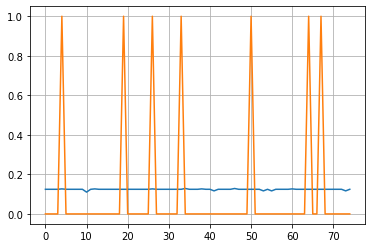

In [434]:
# Calculating accuracy:-------------------------------------------------------------------
from sklearn.metrics import (f1_score,roc_auc_score,precision_score,classification_report,precision_recall_curve,confusion_matrix)

plt.plot(y_predict[:75],label='predict')
plt.plot(y_test.values[:75],label='true')
plt.grid('On')
plt.show()



In [435]:
precision,recall,thresholds = precision_recall_curve(y_test.values,y_predict)